<a href="https://colab.research.google.com/github/AKASH4671/AI-Driven-Credit-Risk-Prediction-and-Crisis-Resilience-Analysis/blob/main/02_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

**Load the cleaned dataset**

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Finance Projects/AI-Driven-Credit-Risk-Prediction-and-Crisis-Resilience-Analysis/data/cleaned data/lendingclub_model_ready.csv'
df = pd.read_csv(file_path)

# shape
print("Shape:", df.shape)
df.head(3)

/tmp/ipython-input-3-1186443649.py:2: DtypeWarning: Columns (27,86,97,98,99,102,103,104,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Shape: (1345350, 120)


,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_default
0,3600.0,3600.0,36 months,13.99,123.03,C,10+ years,MORTGAGE,55000.0,Not Verified,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1,24700.0,24700.0,36 months,11.99,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
2,20000.0,20000.0,60 months,10.78,432.66,B,10+ years,MORTGAGE,63000.0,Not Verified,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0


**Basic Target Distribution (Default vs Non-default)**

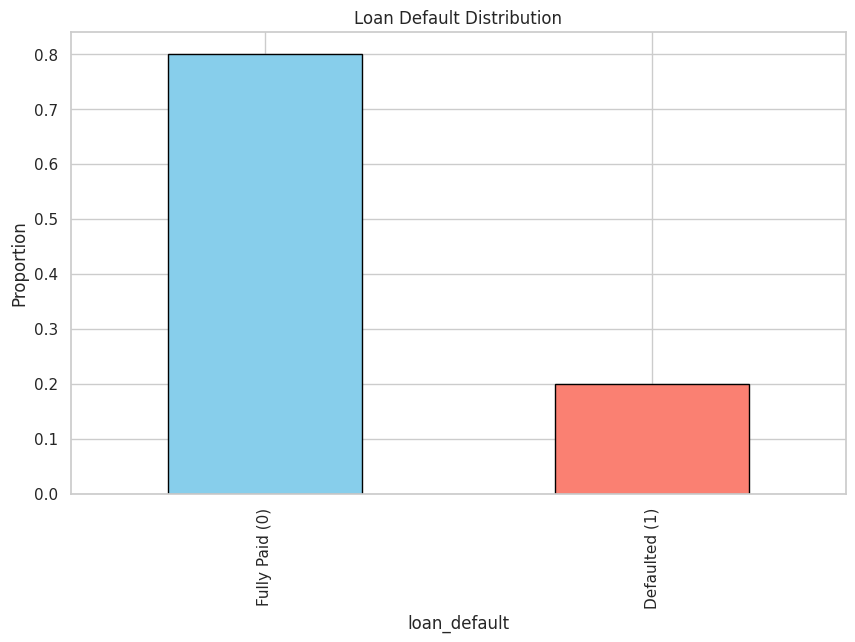

In [4]:
# Value counts + percentage
df['loan_default'].value_counts(normalize=True).plot(
    kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Loan Default Distribution')
plt.xticks(ticks=[0,1], labels=['Fully Paid (0)', 'Defaulted (1)'])
plt.ylabel('Proportion')
plt.show()

**FICO Score vs Default**

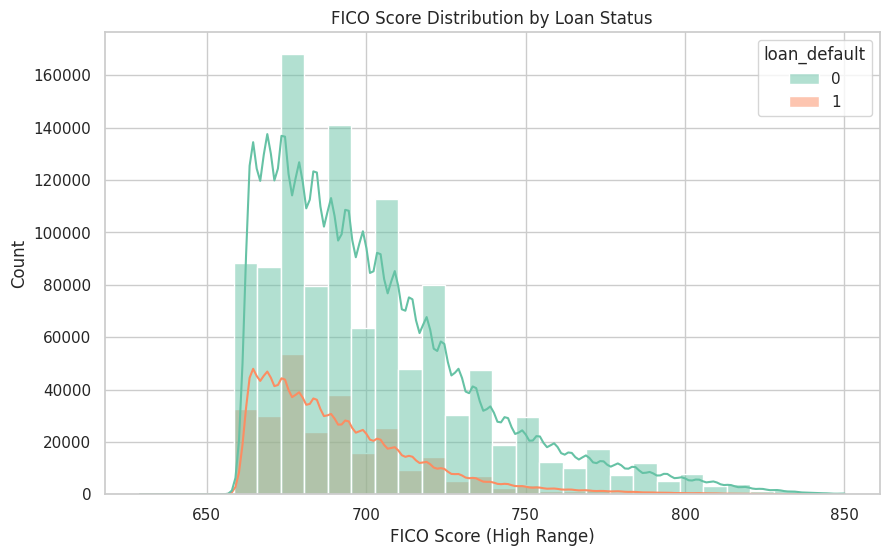

In [5]:
sns.histplot(data=df, x='fico_range_high', hue='loan_default', bins=30, kde=True, palette='Set2')
plt.title('FICO Score Distribution by Loan Status')
plt.xlabel('FICO Score (High Range)')
plt.ylabel('Count')
plt.show()

In [16]:
df.groupby('loan_default')['fico_range_high'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_default,,,,,,,,
0,1076751.0,702.264062,32.834366,629.0,679.0,694.0,719.0,850.0
1,268599.0,691.852483,25.952179,664.0,674.0,684.0,704.0,850.0


**Annual Income vs Default**

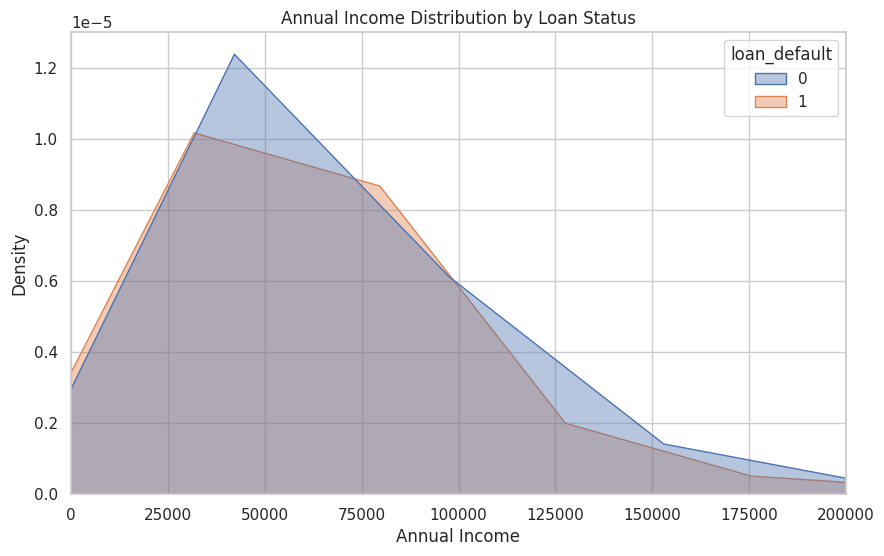

In [6]:
sns.kdeplot(data=df, x='annual_inc', hue='loan_default', fill=True, common_norm=False, alpha=0.4)
plt.xlim(0, 200000)  # Clip high outliers
plt.title('Annual Income Distribution by Loan Status')
plt.xlabel('Annual Income')
plt.show()

In [15]:
# Bin annual income
income_bins = pd.cut(df['annual_inc'], bins=[0, 25000, 50000, 75000, 100000, 150000, 200000, 500000])
income_default = df.groupby(income_bins)['loan_default'].mean().reset_index()

# Print default rate per income bin
print(" Default Rate by Annual Income Range:\n")
print(income_default.rename(columns={'loan_default': 'default_rate'}))


 Default Rate by Annual Income Range:

         annual_inc  default_rate
0        (0, 25000]      0.244750
1    (25000, 50000]      0.227027
2    (50000, 75000]      0.204842
3   (75000, 100000]      0.182558
4  (100000, 150000]      0.161780
5  (150000, 200000]      0.150470
6  (200000, 500000]      0.139362


/tmp/ipython-input-15-1603160058.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_default = df.groupby(income_bins)['loan_default'].mean().reset_index()


**Debt-to-Income (DTI) Ratio vs Default**

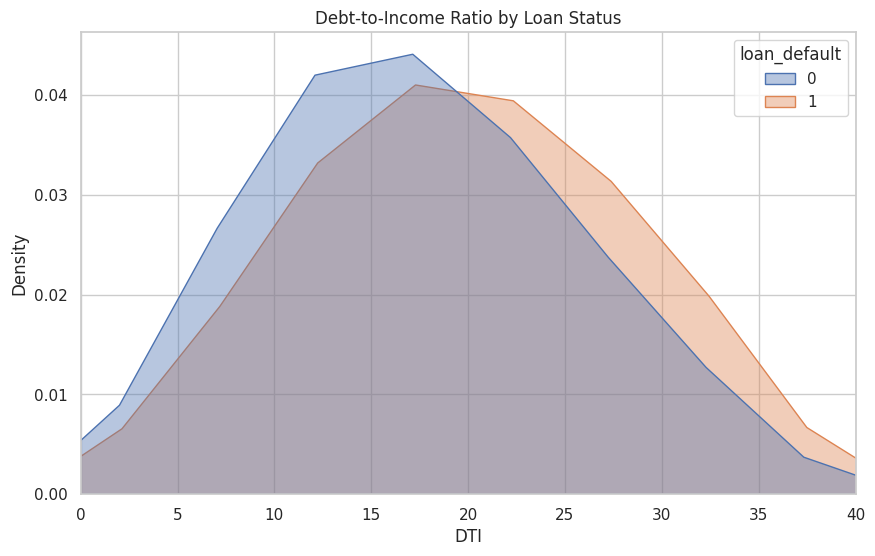

In [7]:
sns.kdeplot(data=df, x='dti', hue='loan_default', fill=True, common_norm=False, alpha=0.4)
plt.title('Debt-to-Income Ratio by Loan Status')
plt.xlabel('DTI')
plt.xlim(0, 40)
plt.show()

In [13]:
# Bin DTI
dti_bins = pd.cut(df['dti'], bins=[0, 5, 10, 15, 20, 25, 30, 40, 100])
dti_default = df.groupby(dti_bins)['loan_default'].mean().reset_index()

# Print default rate per DTI range
print(" Default Rate by DTI Range:\n")
print(dti_default.rename(columns={'loan_default': 'default_rate'}))


 Default Rate by DTI Range:

         dti  default_rate
0     (0, 5]      0.146717
1    (5, 10]      0.149428
2   (10, 15]      0.165967
3   (15, 20]      0.190285
4   (20, 25]      0.217496
5   (25, 30]      0.249204
6   (30, 40]      0.291021
7  (40, 100]      0.308680


/tmp/ipython-input-13-2506249130.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_default = df.groupby(dti_bins)['loan_default'].mean().reset_index()


**Loan Grade vs Default Rate**

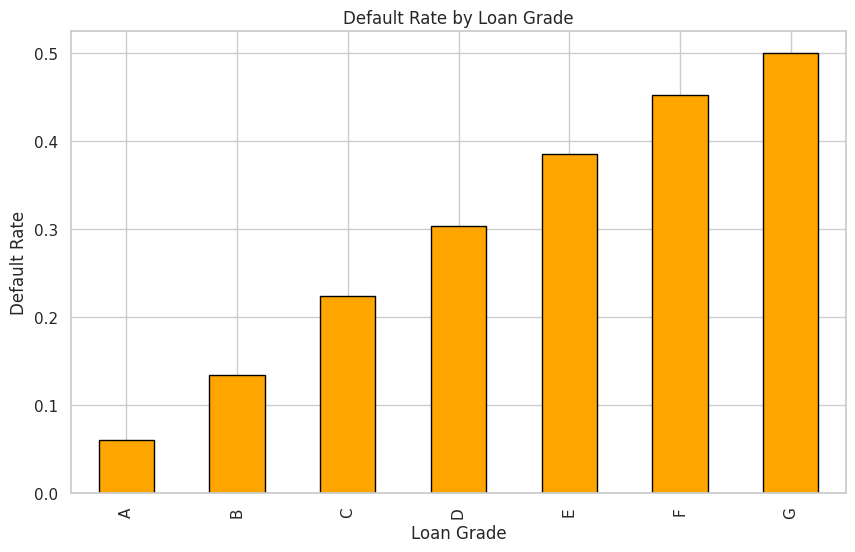

In [8]:
# Default rate by loan grade
grade_default = df.groupby('grade')['loan_default'].mean().sort_values()

grade_default.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Default Rate by Loan Grade')
plt.ylabel('Default Rate')
plt.xlabel('Loan Grade')
plt.show()

In [12]:
grade_default = df.groupby('grade')['loan_default'].mean().reset_index().sort_values(by='loan_default')

print(" Default Rate by Loan Grade:\n")
print(grade_default.rename(columns={'loan_default': 'default_rate'}))


 Default Rate by Loan Grade:

  grade  default_rate
0     A      0.060427
1     B      0.133867
2     C      0.224413
3     D      0.303867
4     E      0.384823
5     F      0.452042
6     G      0.499343


**Purpose of Loan vs Default Rate**

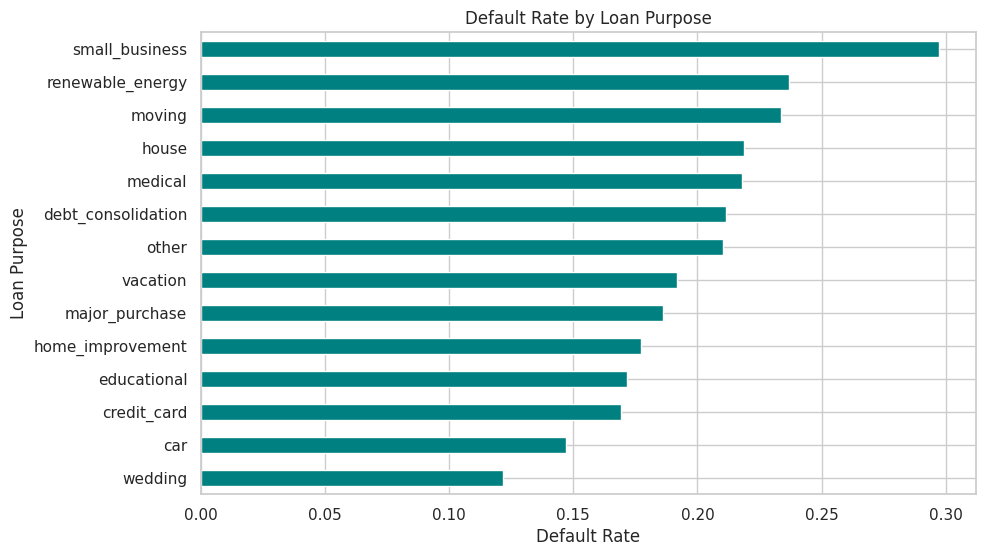

In [9]:
purpose_default = df.groupby('purpose')['loan_default'].mean().sort_values()

purpose_default.plot(kind='barh', color='teal')
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Default Rate')
plt.ylabel('Loan Purpose')
plt.show()

In [14]:
purpose_default = df.groupby('purpose')['loan_default'].mean().reset_index().sort_values(by='loan_default', ascending=False)

print(" Default Rate by Loan Purpose:\n")
print(purpose_default.rename(columns={'loan_default': 'default_rate'}))


 Default Rate by Loan Purpose:

               purpose  default_rate
11      small_business      0.297094
10    renewable_energy      0.236870
8               moving      0.233544
5                house      0.218914
7              medical      0.217858
2   debt_consolidation      0.211491
9                other      0.210422
12            vacation      0.191726
6       major_purchase      0.186054
4     home_improvement      0.177186
3          educational      0.171779
1          credit_card      0.169287
0                  car      0.146970
13             wedding      0.121622


**Correlation Heatmap**

In [18]:
#Select Only Numeric Columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_numeric = df[numeric_cols]

In [19]:
#Calculate Correlation Matrix
correlation_matrix = df_numeric.corr()
correlation_matrix['loan_default'].sort_values(ascending=False)

,loan_default
loan_default,1.000000
int_rate,0.258806
hardship_dpd,0.244865
hardship_amount,0.173699
orig_projected_additional_accrued_interest,0.173143
...,...
sec_app_fico_range_high,-0.251849
last_fico_range_low,-0.575702
last_fico_range_high,-0.667849
deferral_term,NaN


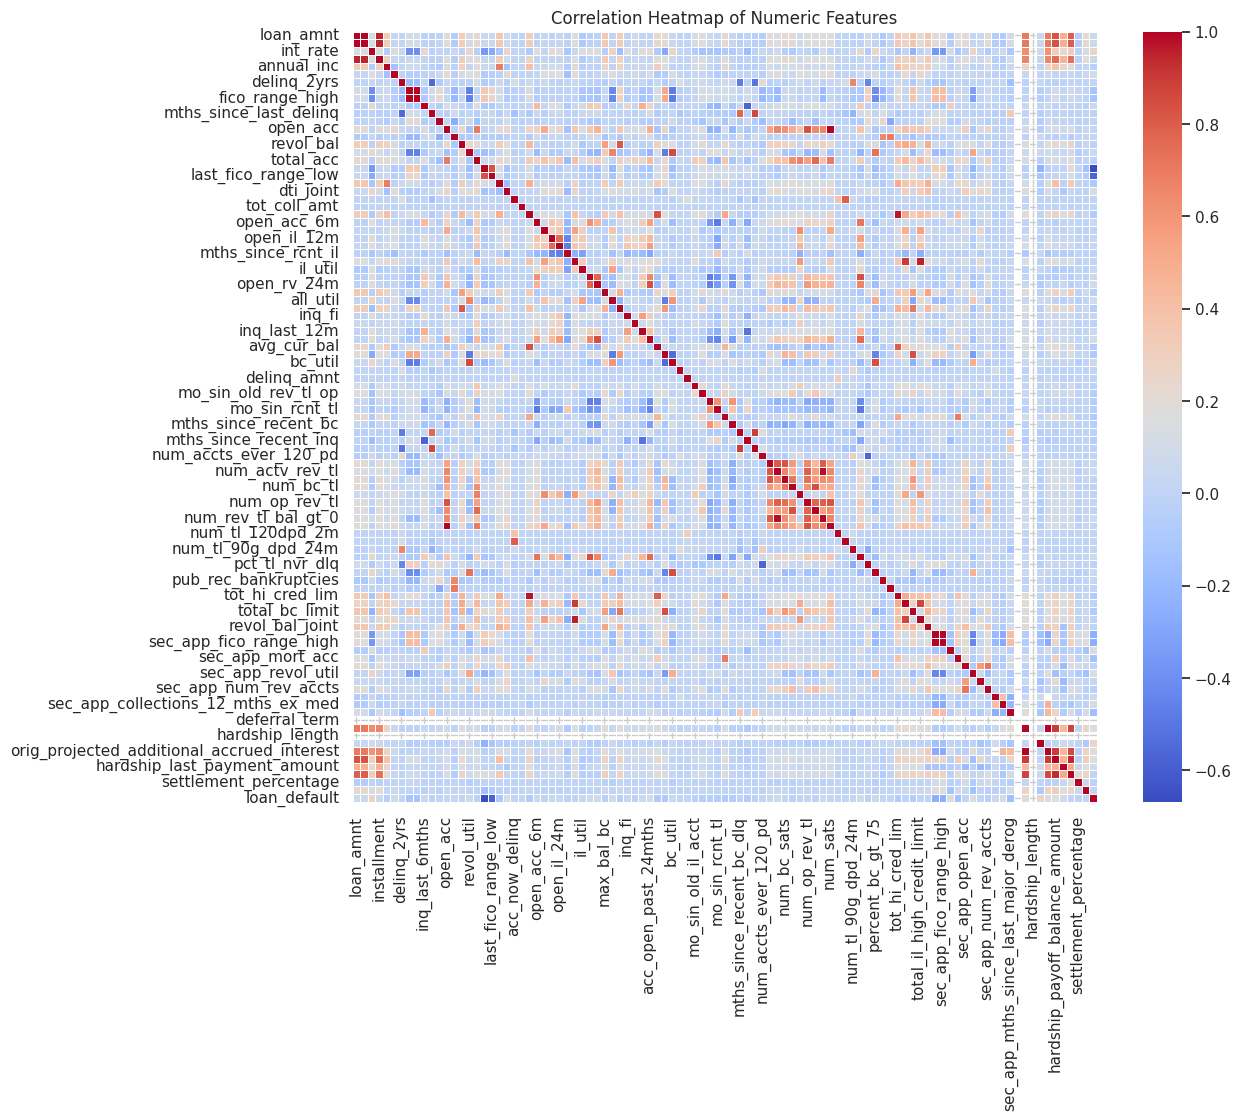

In [20]:
#Plot Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

**Missing Values Check**

In [21]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

,0
orig_projected_additional_accrued_interest,1341589
hardship_loan_status,1339594
hardship_dpd,1339594
hardship_start_date,1339594
hardship_end_date,1339594
...,...
pub_rec_bankruptcies,697
dti,374
chargeoff_within_12_mths,56
tax_liens,39


In [22]:
#Check % of Missing for Each Column
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_percent[missing_percent > 0]

,0
orig_projected_additional_accrued_interest,99.720444
payment_plan_start_date,99.572156
hardship_payoff_balance_amount,99.572156
hardship_last_payment_amount,99.572156
hardship_type,99.572156
...,...
pub_rec_bankruptcies,0.051808
dti,0.027799
chargeoff_within_12_mths,0.004162
tax_liens,0.002899
